In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from collections import OrderedDict
from itertools import product
import h5py
import numpy as np
from scipy.stats import pearsonr

In [3]:
from tang_jcompneuro.model_fitting_postprocess import load_model_performance

In [4]:
debug_file = '/home/yimengzh/tang_jcompneuro/results/models/glm_fitting_shape_cv.hdf5'

In [5]:
mapping_dict = OrderedDict()
mapping_dict['0/half+linear+None+poisson+L1'] = 'linear_poisson'
mapping_dict['0/half+fpower+None+poisson+L1'] = 'fpower_poisson'
mapping_dict['0/half+linear+None+gaussian+L1'] = 'linear_gaussian'
mapping_dict['0/half+fpower+None+gaussian+L1'] = 'fpower_gaussian'

subsets_to_check = ('all', 'OT')
datasets_to_check = ('MkA_Shape', 'MkE2_Shape')

In [6]:
def show_one_case(score_old, score_new, title):
    plt.close('all')
    plt.figure()
    plt.scatter(score_old, score_new)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,1], [0,1], linestyle='--', color='r')
    plt.title(title + ' ' + 'old {:.3f}, new {:.3f}, corr {:.3f}'.format(score_old.mean(), score_new.mean(),
                                                            pearsonr(score_old, score_new)[0]))
    plt.xlabel('old')
    plt.ylabel('new')
    plt.axis('equal')
    plt.show()

In [7]:
def check_all():
    for dataset, subset in product(datasets_to_check, subsets_to_check):
        print(dataset, subset)
        for old_model, new_model in mapping_dict.items():
            with h5py.File(debug_file, 'r') as f_old:
                score_old = f_old[old_model + f'/{dataset}/{subset}/cv_score'][...].mean(axis=1)
            score_new = np.asarray(
                [load_model_performance(dataset, subset, 100, s, 'glm', new_model)['corr'] for s in range(2)]
            ).mean(axis=0)
            assert score_new.shape == score_old.shape and score_new.ndim == 1
            assert np.all(np.isfinite(score_new)) and np.all(np.isfinite(score_old))
            
            show_one_case(score_old, score_new, new_model)

MkA_Shape all


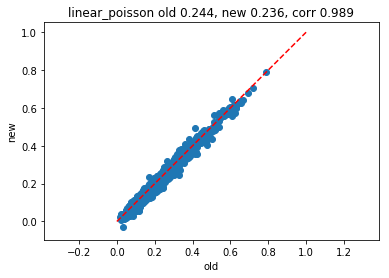

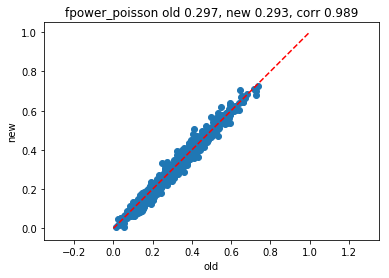

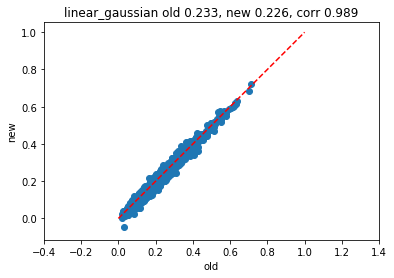

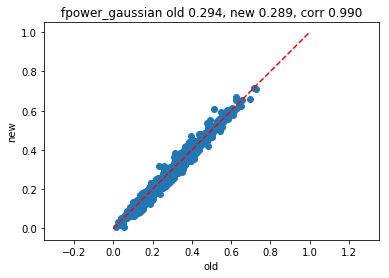

MkA_Shape OT


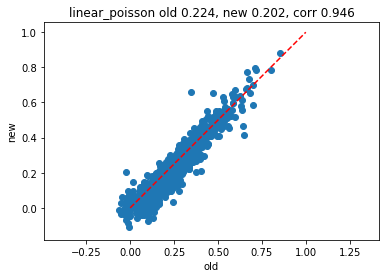

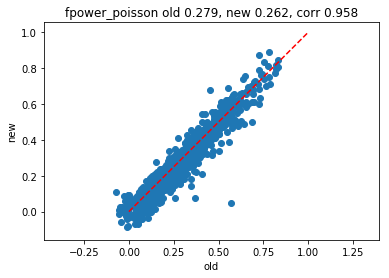

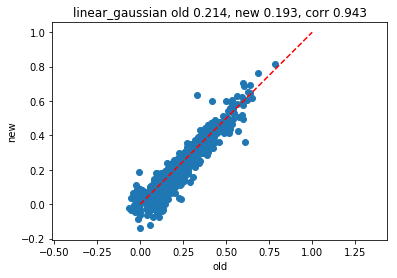

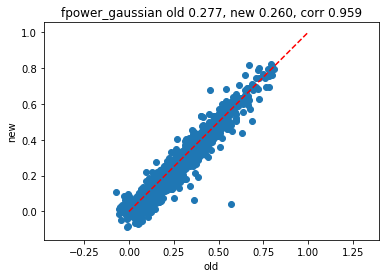

MkE2_Shape all


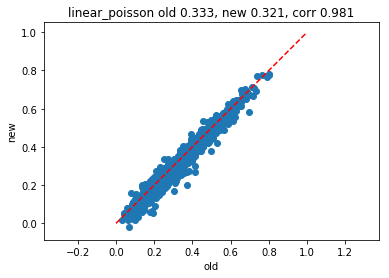

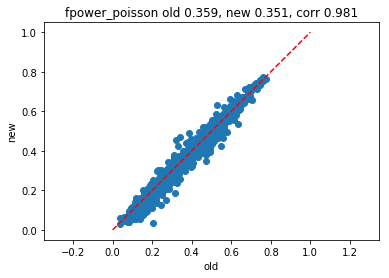

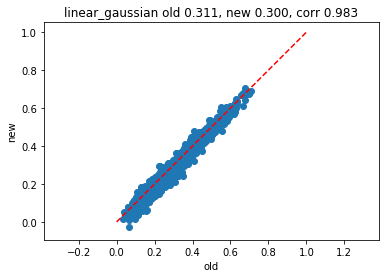

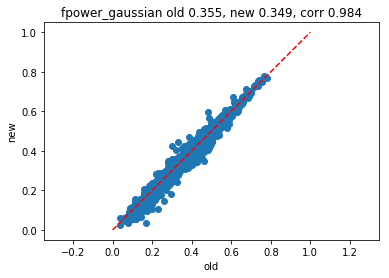

MkE2_Shape OT


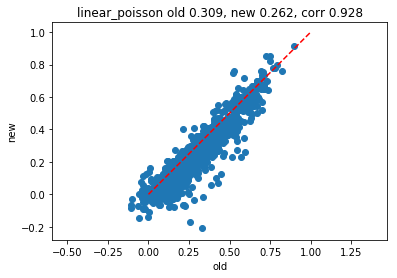

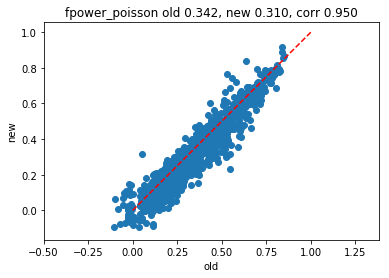

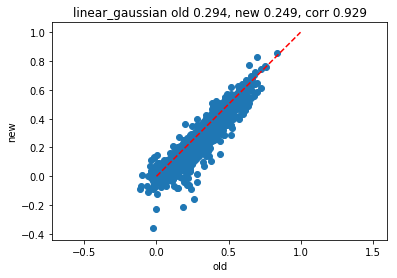

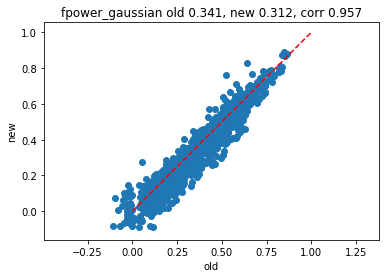

In [8]:
check_all()